In [54]:
# import the necessary packages
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
import cv2

In [80]:

def calculate_mse(imageA, imageB):
	return mse(imageA, imageB)

def calculate_psnr(imageA, imageB):
	return psnr(imageA, imageB)

def calculate_ssim(imageA, imageB):
	return ssim(imageA, imageB)

def compare_images(original, contrast, shopped, title):
	# compute the mean squared error, peak signal noise ratio and structural similarity

	fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 4), sharex=True, sharey=True)
	ax = axes.ravel()

	# setup the figure
	ax[0].imshow(original, cmap=plt.cm.gray)
	ax[0].set_xlabel(f'MSE: {calculate_mse(original,original):.2f}, SSIM: {calculate_ssim(original,original):.2f}')
	ax[0].set_title('Original image')

	ax[1].imshow(contrast, cmap=plt.cm.gray)
	ax[1].set_xlabel(f'MSE: {calculate_mse(original,contrast):.2f}, PSNR: {calculate_psnr(original,contrast):.2f}, SSIM: {calculate_ssim(original,contrast):.2f}')
	ax[1].set_title('Contrast image')

	ax[2].imshow(shopped, cmap=plt.cm.gray)
	ax[2].set_xlabel(f'MSE: {calculate_mse(original,shopped):.2f}, PSNR: {calculate_psnr(original,shopped):.2f}, SSIM: {calculate_ssim(original,shopped):.2f}')
	ax[2].set_title('Shopped image')
	plt.show()

In [81]:
# load the images -- the original, the original + contrast,
# and the original + photoshop 
# https://links.uwaterloo.ca/Repository/TIF/lena1.tif
original = io.imread("https://ece.uwaterloo.ca/~z70wang/research/quality_index/Image6.gif", True)
contrast = io.imread("https://ece.uwaterloo.ca/~z70wang/research/quality_index/Image7.gif", True)
shopped = io.imread("https://ece.uwaterloo.ca/~z70wang/research/quality_index/Image8.gif", True)
# convert the images to grayscale
# original = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
# contrast = cv2.cvtColor(contrast, cv2.COLOR_BGR2GRAY)
# shopped = cv2.cvtColor(shopped, cv2.COLOR_BGR2GRAY)

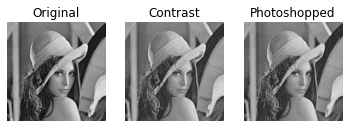

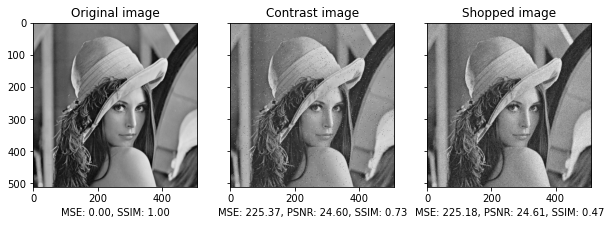

In [82]:
# initialize the figure
fig = plt.figure("Images")
images = ("Original", original), ("Contrast", contrast), ("Photoshopped", shopped)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()

compare_images(original, contrast, shopped, "Original vs. Photoshopped")